In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler,LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
#data - set file 
#https://www.kaggle.com/datasets/mirichoi0218/insurance/data
df= pd.read_csv("insurance.csv")
df= df.dropna()
num_features = df.select_dtypes(include=[int,float]).columns
print(num_features)
encoder= LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker']= encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])
print(df)


Index(['age', 'bmi', 'children', 'charges'], dtype='object')
      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


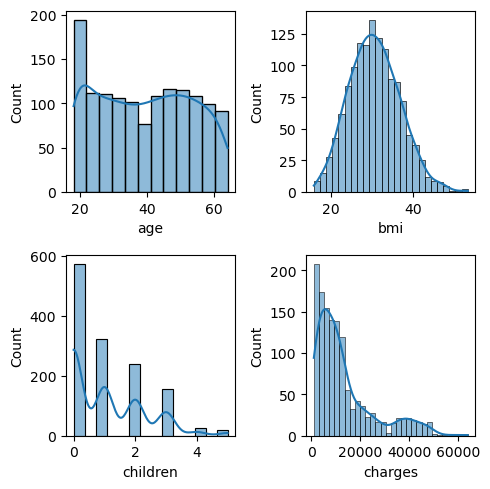

In [91]:

fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (5,5))
axes = axes.flatten()

for i , column in enumerate(num_features):
    ax = axes[i]
    sns.histplot(df[column],kde= True,ax=ax)

plt.tight_layout()
plt.show()

<Axes: >

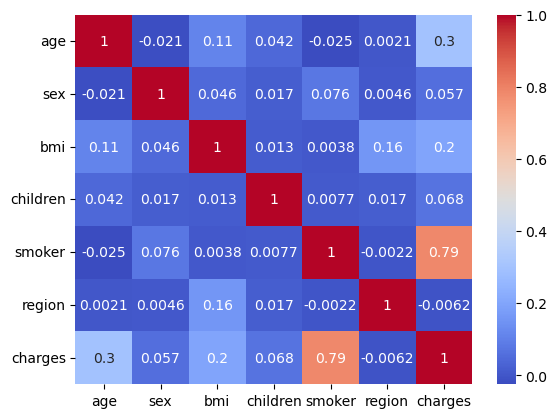

In [92]:
fig ,axs = plt.subplots()
corr = df.corr()
sns.heatmap(corr,cmap= 'coolwarm',annot=True)

In [93]:
x=df.drop("charges",axis=1)
y=df["charges"]

x_train,x_test , y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=1)
scalar = StandardScaler()
x_train_sc = scalar.fit_transform(x_train)
x_test_sc = scalar.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train_sc,y_train)
y_test_pred = model.predict(x_test_sc)
r2 = model.score(x_train_sc,y_train)
mse= mean_squared_error(y_test_pred,y_test)
e = y_test_pred - y_test

print(r2,mse)
plt.show()

0.7475615631933096 35467031.51428286


In [94]:
model = LinearRegression()
poly= PolynomialFeatures(degree = 5)
x_train_poly= poly.fit_transform(x_train_sc)
x_test_poly= poly.fit_transform(x_test_sc)
model.fit(x_train_poly,y_train)
y_test_pred = model.predict(x_test_poly)
r2 = model.score(x_train_poly,y_train)
mse= mean_squared_error(y_test_pred,y_test)
print(r2,mse)

0.888414147694414 1.0739219650263647e+28


In [95]:
model=RandomForestRegressor()
model.fit(x_train_sc,y_train)
y_test_pred = model.predict(x_test_sc)
r2 = model.score(x_test_sc,y_test)
mse= mean_squared_error(y_test_pred,y_test)
e = y_test_pred - y_test
print(r2,mse)



0.8507265575049793 22283634.97246653
